### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Load the Data

In [3]:
df=pd.read_csv("SampleSuperstore.csv" , encoding='ISO-8859-1') # we use ISO-8859-1 as utf-8 is have error
df.head() #show the data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Cleaning Data

In [8]:
df.drop_duplicates()
df.shape

(9994, 21)

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df['Customer Name'].unique().size

793

In [15]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [22]:
df.drop(['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Country','State','Postal Code','Product ID','Product Name'])

KeyError: "['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'State', 'Postal Code', 'Product ID', 'Product Name'] not found in axis"

In [21]:
df['Sub-Category'].unique().size

17

In [33]:
df.isna().sum() # make sure there is not NAN

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [34]:
# Group by product category and calculate total sales and profits
category_summary = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Print the summary
category_summary


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


### Visualize the data

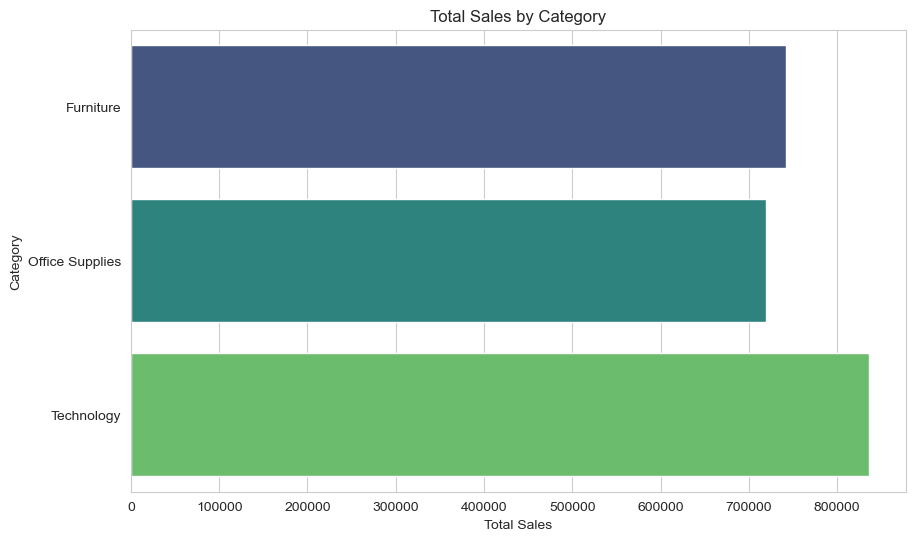

In [35]:
# Set the style for the plots
sns.set_style('whitegrid')

# Create a bar chart for total sales by category
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x='Sales', y='Category', data=category_summary, palette='viridis')
plt.title('Total Sales by Category')  # Title of the chart
plt.xlabel('Total Sales')  # X-axis label
plt.ylabel('Category')  # Y-axis label
plt.show()  # Display the plot


In [16]:
# Group by product category and calculate total sales and profits
seg_summary = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Print the summary
seg_summary

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


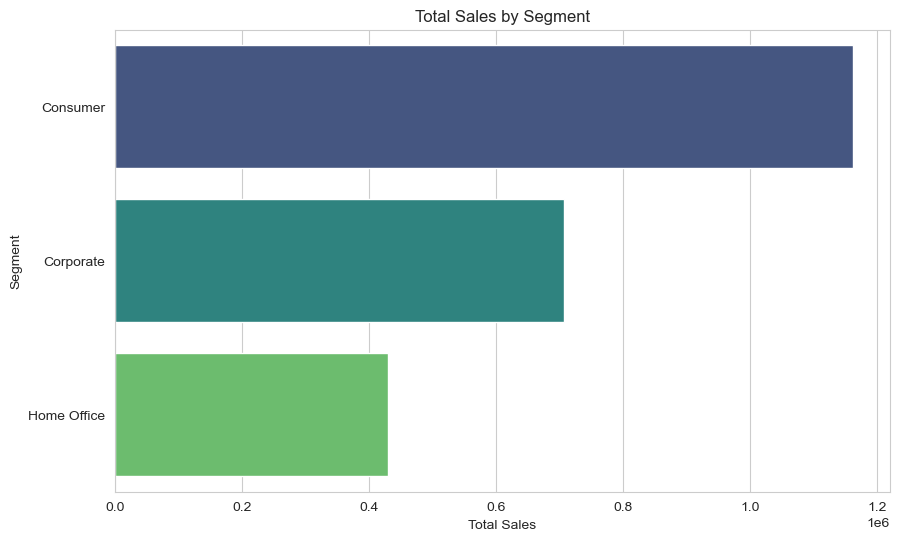

In [17]:
# Set the style for the plots
sns.set_style('whitegrid')

# Create a bar chart for total sales by category
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.barplot(x='Sales', y='Segment', data=seg_summary, palette='viridis')
plt.title('Total Sales by Segment')  # Title of the chart
plt.xlabel('Total Sales')  # X-axis label
plt.ylabel('Segment')  # Y-axis label
plt.show()  # Display the plot


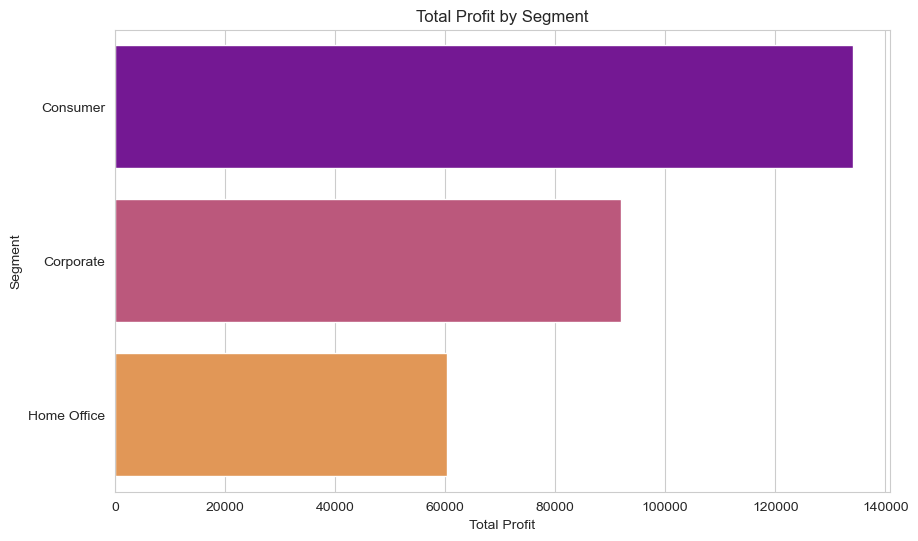

In [18]:
# Create a bar chart for profit by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Segment', data=seg_summary, palette='plasma')
plt.title('Total Profit by Segment')
plt.xlabel('Total Profit')
plt.ylabel('Segment')
plt.show()


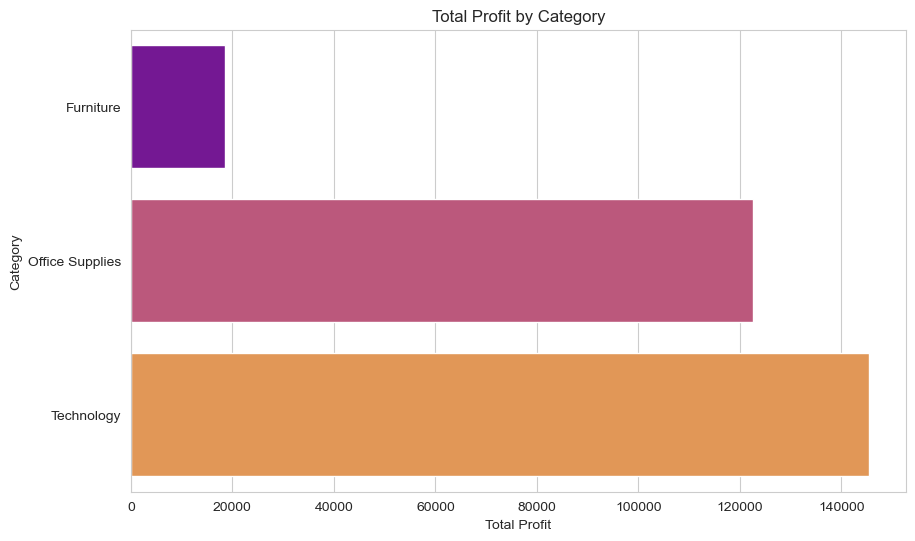

In [36]:
# Create a bar chart for profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Category', data=category_summary, palette='plasma')
plt.title('Total Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()


In [38]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Group by YearMonth and calculate total sales
monthly_sales = df.groupby('YearMonth').agg({'Sales': 'sum'}).reset_index()
monthly_sales

,YearMonth,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


In [40]:
monthly_sales.dtypes

YearMonth    period[M]
Sales          float64
dtype: object

In [41]:
# Convert YearMonth to string
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)


In [ ]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=30, kde=True)  # kde=True adds a kernel density estimate for smoothing

# Customize the plot
plt.title('Sales Distribution Histogram', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
